In [1]:
## CHANGE ALL THE BELOW CELLS FOR THE GH PATH!!

# Add a command to produce plots directly below cells.
%matplotlib inline
# Import required packages
import numpy as np
import os
# Import xarray and glob for data analysis.
import xarray as xr
from glob import glob
# Dask for processing
import dask as da

os.chdir("/home/561/gp8431")
from climate import StandardGrid
from climate import Projection

import matplotlib.pyplot as plt

# Change working directory.
os.chdir("/scratch/w40/gp8431/run")

In [2]:
# Extract era temperature data
files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/t/*/*')
files.sort()
era_all = xr.open_mfdataset(files, combine='by_coords').t #.rename({"t":"temp"})
era_clim = era_all.groupby('time.month').mean()

In [3]:
# Extract era geopotential data
files_hght = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/z/*/*')
files_hght.sort()
era_all_hght = xr.open_mfdataset(files_hght, combine='by_coords').z #.rename({"t":"temp"})
era_clim_hght = era_all_hght.groupby('time.month').mean()

# Convert to geopotential height by dividing by g.
g = 9.80665
era_all_hght = era_all_hght/g
era_clim_hght = era_clim_hght/g

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


In [4]:
# Compute temperature anomaly in era data and adjust data.

era_anom = era_all.sel(time=slice('2019-01-01','2019-12-31')).groupby('time.month')-era_clim

era_anom = era_anom.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})

era_anom = StandardGrid(era_anom, lon_name='lon', lat_name='lat')

era_anom_oct = era_anom.sel(time=slice('2019-10-01','2019-10-31'))

#era_anom['lon'] = (era_anom['lon'] + 180.0)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ... 

In [5]:
# Compute temperature anomaly in era data and adjust data.

era_anom_hght = era_all_hght.sel(time=slice('2019-01-01','2019-12-31')).groupby('time.month')-era_clim_hght

era_anom_hght = era_anom_hght.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})

era_anom_hght = StandardGrid(era_anom_hght, lon_name='lon', lat_name='lat')

era_anom_oct_hght = era_anom_hght.sel(time=slice('2019-10-01','2019-10-31'))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ... 

In [6]:
era_anom_hght

<xarray.DataArray 'z' (time: 12, pfull: 37, lat: 721, lon: 1440)>
dask.array<getitem, shape=(12, 37, 721, 1440), dtype=float32, chunksize=(1, 37, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * pfull    (pfull) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [7]:
# Extract nh model data
os.listdir()

os.chdir("/scratch/w40/gp8431/run/2201_constamp_0.0")
nh_for = xr.open_dataset("plevel_daily_gh.nc", decode_times = False).temp
nh_for_davg = nh_for.mean('time')

nh_for_hght = xr.open_dataset("plevel_daily_gh.nc", decode_times = False).hght
nh_for_hght_davg = nh_for_hght.mean('time')


In [30]:
# Create empty list where average differences for each srfamp will go.
dt_IOD = []
# Create empty list where srfamp values will go.
# FOR NOW, TWO EMPTY LISTS CREATED TO WORK AROUND AN ERROR!
amp_mta = []
amp_lp = []
amp_mha = []
amp_lph = []
# Create an empty list to fill with mod_temp_anom arrays for plotting.
mta_list = []
mha_list = []
# Create an empty list to fill with lon_p arrays for plotting.
lon_p_list = []
lon_p_list_h = []

# Define figures to add subplots to.
fig_era = plt.figure(figsize=(16,16))
fig_era_500 = plt.figure(figsize=(16,16))
fig_era_lon_p = plt.figure(figsize=(16,16))
fig_model = plt.figure(figsize=(16,16))

fig_era_h = plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [31]:
era_temp_anom_h = era_anom_oct_hght.sel(pfull=300.0, lat=slice(-30.0, 30.0))
ax_era_h = fig_era_h.add_subplot(1, 1, 1)
cax_era_h = ax_era_h.pcolormesh(era_temp_anom_h.lon, era_temp_anom_h.lat, era_temp_anom_h.squeeze().values, vmin=-5, vmax=5)
era_temp_anom_h.plot(ax=ax_era_h)
ax_era_h.set(title = 'era_h')
#cbar_era = fig_era.colorbar(cax_era)
fig_era_h.savefig('/home/561/gp8431/fig_era_h.png')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
era_temp_anom_lon_p = era_anom_oct.sel(lat=0.0, method="nearest").sel(pfull=slice(300,1000))
ax_era_lon_p = fig_era_lon_p.add_subplot(1, 1, 1)
cax_era_lon_p = ax_era_lon_p.pcolormesh(era_temp_anom_lon_p.lon, era_temp_anom_lon_p.pfull, era_temp_anom_lon_p.squeeze().values, vmin=-5, vmax=5)
era_temp_anom_lon_p.plot(ax=ax_era_lon_p)
ax_era_lon_p.set(title = 'era_lon_p')
#cbar_era = fig_era.colorbar(cax_era)
fig_era_lon_p.savefig('/home/561/gp8431/fig_era_lon_p.png')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
###era_temp_anom = era_anom_oct.sel(pfull=1000.0, method='nearest')
era_temp_anom = era_anom_oct.sel(pfull=1000.0, lat=slice(-30.0, 30.0))
ax_era = fig_era.add_subplot(1, 1, 1)
cax_era = ax_era.pcolormesh(era_temp_anom.lon, era_temp_anom.lat, era_temp_anom.squeeze().values, vmin=-5, vmax=5)
era_temp_anom.plot(ax=ax_era)
ax_era.set(title = 'era')
#cbar_era = fig_era.colorbar(cax_era)
fig_era.savefig('/home/561/gp8431/fig_era.png')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


In [13]:
###era_temp_anom = era_anom_oct.sel(pfull=1000.0, method='nearest')
era_temp_anom_500 = era_anom_oct.sel(pfull=500.0, lat=slice(-30.0, 30.0))
ax_era_500 = fig_era_500.add_subplot(1, 1, 1)
#cax_era_300 = ax_era_300.pcolormesh(era_temp_anom_300.lon, era_temp_anom_300.lat, era_temp_anom_300.squeeze().values, vmin=-5, vmax=5)
era_temp_anom_500.plot(ax=ax_era_500)
ax_era_500.set(title = 'era_500')
#cbar_era = fig_era.colorbar(cax_era)
fig_era_500.savefig('/home/561/gp8431/fig_era_500.png')

In [32]:
# Initialise an indexing variable 
i = 0

# Extract model data in a loop
for x in ["0.1", "0.2", "0.4", "0.6", "0.8", "1.0", "1.2", "1.4"]: #, "10.0"]:
#for x in ["0.0", "0.1", "1.0", "10.0"]:
    # Only extract temp
    gh_for = xr.open_dataset("/scratch/w40/gp8431/run/2201_constamp_"+x+"/plevel_daily_gh.nc", decode_times = False).temp
    gh_for_davg = gh_for.mean('time')

    gh_for_hght = xr.open_dataset("/scratch/w40/gp8431/run/2201_constamp_"+x+"/plevel_daily_gh.nc", decode_times = False).hght
    gh_for_hght_davg = gh_for_hght.mean('time')     
    
    
    mod_lat = xr.open_dataset("plevel_daily_gh.nc", decode_times = False).lat
    mod_lon = xr.open_dataset("plevel_daily_gh.nc", decode_times = False).lon

    # Compute anomaly based on extracted model values.
    mod_anom = gh_for_davg-nh_for_davg
    
    # Compute height anomaly based on extracted values
    mod_anom_hght = gh_for_hght_davg-nh_for_hght_davg

    # Extract the era and model output at the surface.
    # CHANGED TO RESTRICT TO +-30 in lat!!!
    ##era_temp_anom = era_anom_oct.sel(pfull=1000.0, method='nearest')
    ##mod_temp_anom = mod_anom.sel(pfull=1000.0, method='nearest')
    
    era_temp_anom = era_anom_oct.sel(pfull=1000.0, lat=slice(-30.0, 30.0))
    
    era_hght_anom = era_anom_oct_hght.sel(pfull=1000.0, lat=slice(-30.0, 30.0))
    
    mod_temp_anom = mod_anom.sel(pfull=1000.0, lat=slice(-30.0, 30.0))
    
    # Select 300 as this is where waves propagate!!
    mod_hght_anom = mod_anom_hght.sel(pfull=300.0, lat=slice(-30.0, 30.0))
    
    mod_temp_anom_ds = mod_temp_anom.to_dataset(name='temp')
    
    mod_hght_anom_ds = mod_hght_anom.to_dataset(name='hght')
    
    # Add dim to mod_temp_anom
    #mod_temp_anom_ds['amp'] = float(x)
    # TRY THIS
    mod_temp_anom_ds['amp'] = amp_mta.append(float(x))
    #mod_temp_anom_ds['amp'] = amp
    
    mta_list.append(mod_temp_anom_ds)
    
    mod_hght_anom_ds['amp'] = amp_mha.append(float(x))
    mha_list.append(mod_hght_anom_ds)
    
    
    # WRITE ANOTHER LIST FOR PLOTTING LON/PRESSURE!
    # FIGURE OUT HOW TO APPEND AMP ONLY ONCE
    mod_temp_anom_eq = mod_anom.sel(lat=0.0, method='nearest')
    mod_temp_anom_eq_ds = mod_temp_anom_eq.to_dataset(name='temp')
    mod_temp_anom_eq_ds['amp'] = amp_lp.append(float(x))
    lon_p_list.append(mod_temp_anom_eq_ds)
    
    mod_hght_anom_eq = mod_anom_hght.sel(lat=0.0, method='nearest')
    mod_hght_anom_eq_ds = mod_hght_anom_eq.to_dataset(name='hght')
    mod_hght_anom_eq_ds['amp'] = amp_lph.append(float(x))
    lon_p_list_h.append(mod_hght_anom_eq_ds)
    
    ### CHANGE PLOTTING TO FACET AFTER LOOP AND ADD EXTRA DIM!
    
    #ax_mod = fig_model.add_subplot(3, 3, i+1)
    #cax_mod = ax_mod.pcolormesh(mod_lon, mod_lat, mod_temp_anom.squeeze().values)
    #mod_temp_anom.plot(ax=ax_mod)
    #ax_mod.set(title = 'model_' + x)
    ##cbar_mod = fig_model.colorbar(cax_mod)
    #fig_model.savefig('/home/561/gp8431/fig_model.png')
    
    # SHOULD I ALSO AVERAGE DATA FOR HGHT??
    
    # Average data and model temperatures over heating box.
    era_temp_anom_box = era_temp_anom.sel(lat=slice(-5.0, 5.0), lon=slice(55.0, 65.0))
    era_temp_anom_boxav = era_temp_anom_box.mean(dim='lat').mean(dim='lon')

    mod_temp_anom_box = mod_temp_anom.sel(lat=slice(-5.0, 5.0), lon=slice(55.0, 65.0))
    mod_temp_anom_boxav = mod_temp_anom_box.mean(dim='lat').mean(dim='lon')

    # Take the difference in average box temp between model and data.
    diff = era_temp_anom_boxav-mod_temp_anom_boxav
    
    # Convert the diff DataArray to a DataSet.
    diff_ds = diff.to_dataset(name='temp')
    # Add the dimension 'amp' to the DataSet.
    diff_ds['amp'] = amp_mta
    # Append the DataSet to the list.
    dt_IOD.append(diff_ds)

    i = i + 1

In [33]:
# Concatenate the lists along the dimension 'amp'.
dt_IOD_concat = xr.concat(dt_IOD, dim='amp')
mta_list_concat = xr.concat(mta_list, dim='amp')
lon_p_list_concat = xr.concat(lon_p_list, dim='amp')
mha_list_concat = xr.concat(mha_list, dim='amp')
lon_p_list_h_concat = xr.concat(lon_p_list_h, dim='amp')

In [34]:
mta_list_concat['amp'] = amp_mta

In [35]:
lon_p_list_concat['amp'] = amp_lp
mha_list_concat['amp'] = amp_mha
lon_p_list_h_concat['amp'] = amp_lph

In [36]:
lon_p_list_concat

<xarray.Dataset>
Dimensions:  (amp: 8, lon: 128, pfull: 17)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    lat      float64 1.395
  * pfull    (pfull) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * amp      (amp) float64 0.1 0.2 0.4 0.6 0.8 1.0 1.2 1.4
Data variables:
    temp     (amp, pfull, lon) float32 -0.31274414 -0.21618652 ... 0.20979309

In [37]:
lon_p_list_concat.sel(pfull=slice(1000, 300)).pfull

<xarray.DataArray 'pfull' (pfull: 8)>
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.], dtype=float32)
Coordinates:
    lat      float64 1.395
  * pfull    (pfull) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 300.0
Attributes:
    units:           hPa
    long_name:       pressure
    cartesian_axis:  Z
    axis:            Z
    positive:        down

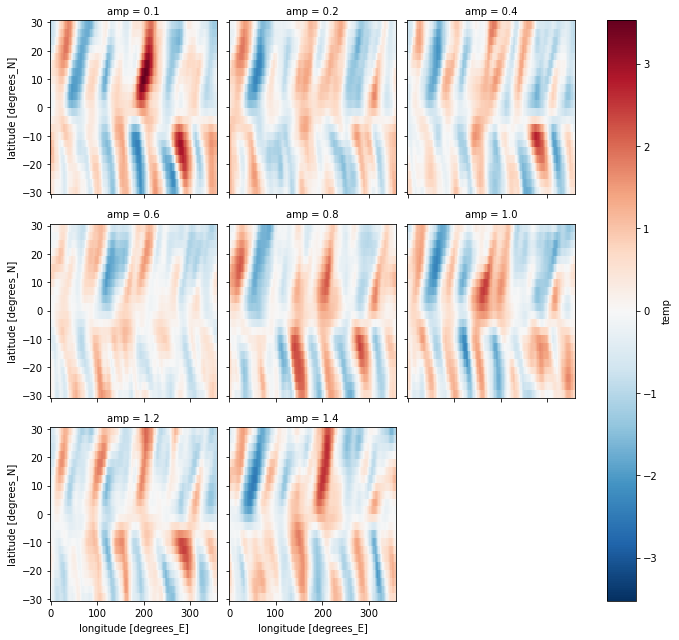

In [38]:
lon_lat_plot_gh = mta_list_concat.temp.plot(x="lon", y="lat", col="amp", col_wrap=3)

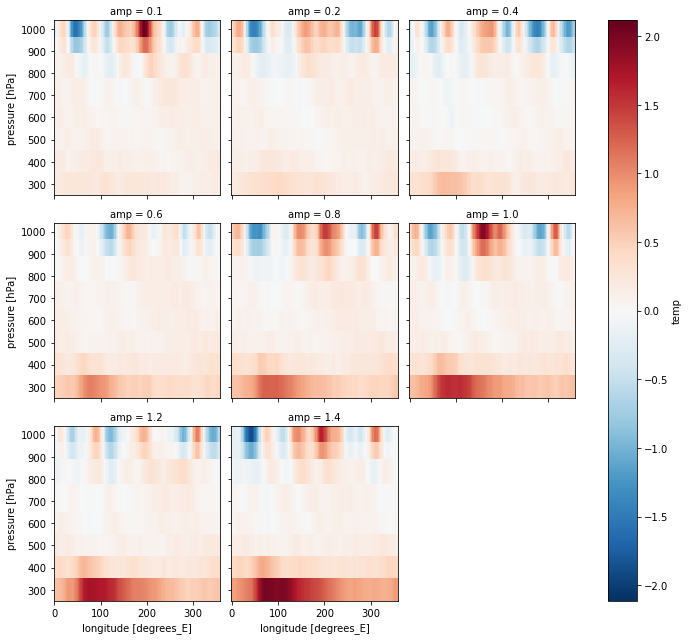

In [39]:
lon_p_plot_gh = lon_p_list_concat.sel(pfull=slice(1000,300)).temp.plot(x="lon", y="pfull", col="amp", col_wrap=3)

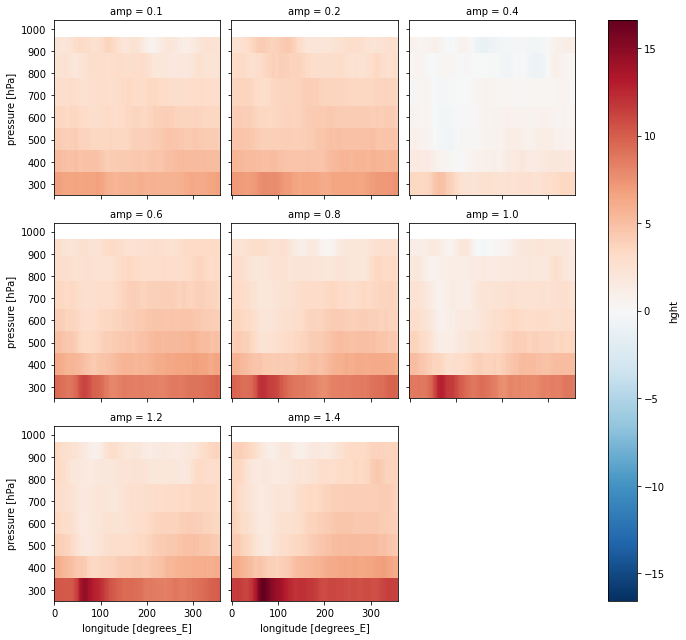

In [40]:
lon_p_plot_gh_hght = lon_p_list_h_concat.sel(pfull=slice(1000,300)).hght.plot(x="lon", y="pfull", col="amp", col_wrap=3)

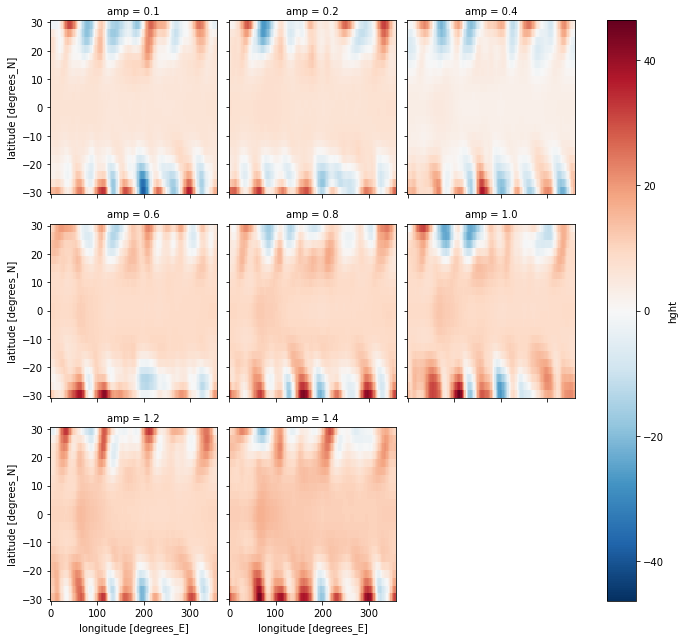

In [41]:
lon_lat_plot_gh_hght = mha_list_concat.hght.plot(x="lon", y="lat", col="amp", col_wrap=3)

In [26]:
mha_list[0].hght

<xarray.DataArray 'hght' (lat: 22, lon: 128)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
    pfull    float32 1000.0

In [29]:
mod_anom_hght.sel(pfull=925.0)

<xarray.DataArray 'hght' (lat: 64, lon: 128)>
array([[-25.544617 , -25.428528 , -25.31836  , ..., -25.919678 ,
        -25.790527 , -25.665527 ],
       [-25.86438  , -25.666748 , -25.485107 , ..., -26.18341  ,
        -25.924377 , -26.080383 ],
       [-25.549866 , -25.79773  , -25.67694  , ..., -25.845459 ,
        -26.300415 , -25.737122 ],
       ...,
       [-17.48584  , -18.802856 , -19.738708 , ..., -11.768738 ,
        -13.958496 , -15.54248  ],
       [ -9.43219  ,  -9.56189  , -10.5720825, ...,  -7.753296 ,
         -8.380493 ,  -8.736938 ],
       [ -8.623108 ,  -8.477539 ,  -8.656494 , ...,  -7.314575 ,
         -8.329163 ,  -8.474487 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
    pfull    float32 925.0